You are a data scientist working for a healthcare company, and you have been tasked with creating a
decision tree to help identify patients with diabetes based on a set of clinical variables. You have been
given a dataset (diabetes.csv) with the following variables:
1. Pregnancies: Number of times pregnant (integer)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
4. SkinThickness: Triceps skin fold thickness (mm) (integer)
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes
based on family history) (float)
8. Age: Age in years (integer)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

Here’s the dataset link:

Your goal is to create a decision tree to predict whether a patient has diabetes based on the other
variables. Here are the steps you can follow:

https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view?usp=sharing

Your goal is to create a decision tree to predict whether a patient has diabetes based on the other
variables. Here are the steps you can follow:

Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to
understand the distribution and relationships between the variables.

In [1]:
#import all library that is important
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#read the csv file
df = pd.read_csv('diabetes (1).csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


observation

after observing this data i find that Glucose,BloodPressure,SkinThickness,Insulin,BMI is not 0 at any time,so we have to replace 0 to th mean of this.

In [5]:
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())

In [6]:
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())

In [7]:
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())

In [8]:
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())

In [9]:
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())

In [10]:
#check the null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

observation 

after observing the dataset there is no null values in the dataset

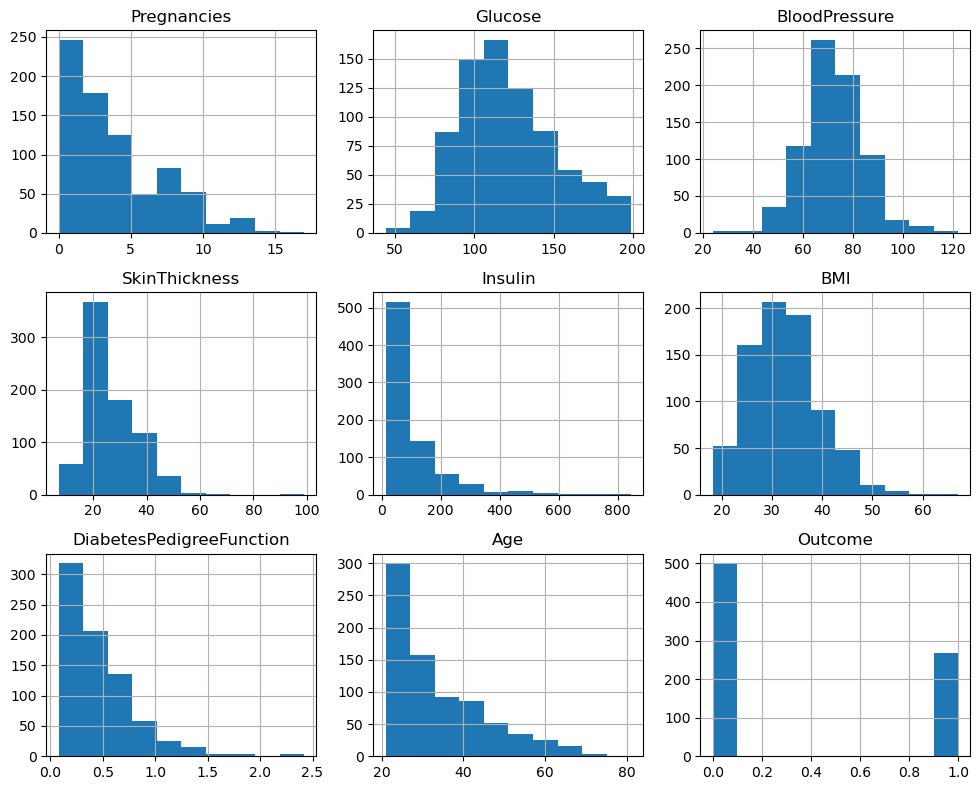

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of variables (histograms)
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()


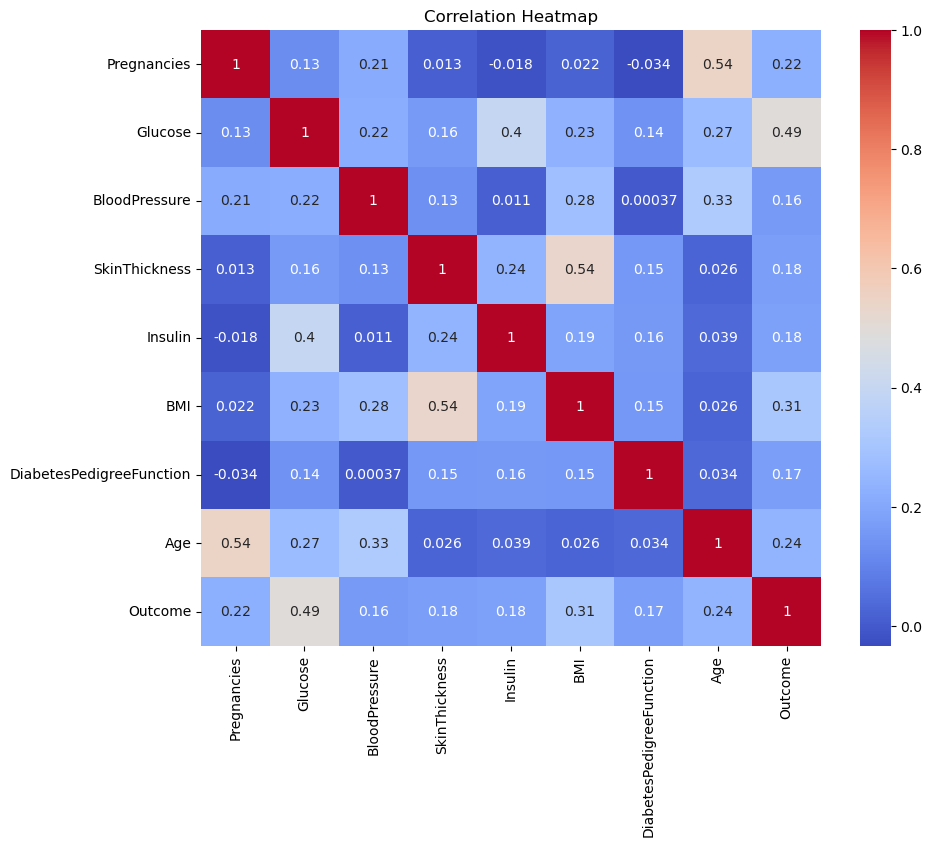

In [41]:
# Correlation heatmap
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical
variables into dummy variables if necessary.

ans - there is no missing values in the dataset

In [48]:
# Step 1: Cleaning missing values
dataset_cleaned = df.dropna()  # Drop rows with missing values
# or
dataset_cleaned = df.fillna(df.mean())  # Fill missing values with the mean


In [49]:
# Step 2: Removing outliers (using Z-score method)
from scipy.stats import zscore

z_scores = zscore(dataset_cleaned)
threshold = 3
dataset_cleaned = dataset_cleaned[(z_scores < threshold).all(axis=1)]  # Remove rows with outliers



In [52]:
# Step 3: Transforming categorical variables into dummy variables
df_clean = pd.get_dummies(dataset_cleaned)

# Print the cleaned and preprocessed dataset
print(df_clean.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness    Insulin   BMI  \
0            6    148.0           72.0      35.000000  79.799479  33.6   
1            1     85.0           66.0      29.000000  79.799479  26.6   
2            8    183.0           64.0      20.536458  79.799479  23.3   
3            1     89.0           66.0      23.000000  94.000000  28.1   
5            5    116.0           74.0      20.536458  79.799479  25.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
5                     0.201   30        0  


Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [14]:
#train test split
from sklearn.model_selection import train_test_split

In [53]:
#independent and dependent features
X = df_clean.drop(columns=['Outcome'])
y =df_clean['Outcome']

In [54]:
# Set the random seed for reproducibility
random_seed = 42

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.35, random_state=23)

In [56]:
X_train.shape

(468, 8)

In [57]:
y_train.shape


(468,)

Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use
cross-validation to optimize the hyperparameters and avoid overfitting.

In [58]:
from sklearn.tree  import DecisionTreeClassifier


In [59]:
tree_classifier = DecisionTreeClassifier()

In [74]:
tree_classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [75]:
#prediction'
y_pred = tree_classifier.predict(X_test)

In [76]:
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1])

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
#parameter
parameter ={
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

    

In [79]:
grid = GridSearchCV(tree_classifier,param_grid=parameter,cv=5)

In [80]:

grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=4),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [81]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [82]:
y_pred = grid.predict(X_test)

In [83]:
y_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1])

Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,
precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [98]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,confusion_matrix, roc_curve, auc


In [99]:
print(confusion_matrix(y_pred,y_test))

[[150  44]
 [ 23  35]]


In [100]:
print(accuracy_score(y_pred,y_test))

0.7341269841269841


In [101]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82       194
           1       0.44      0.60      0.51        58

    accuracy                           0.73       252
   macro avg       0.66      0.69      0.66       252
weighted avg       0.77      0.73      0.75       252



In [109]:
#Calculate the false positive rate (FPR) and true positive rate (TPR) for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)


In [110]:
#Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)


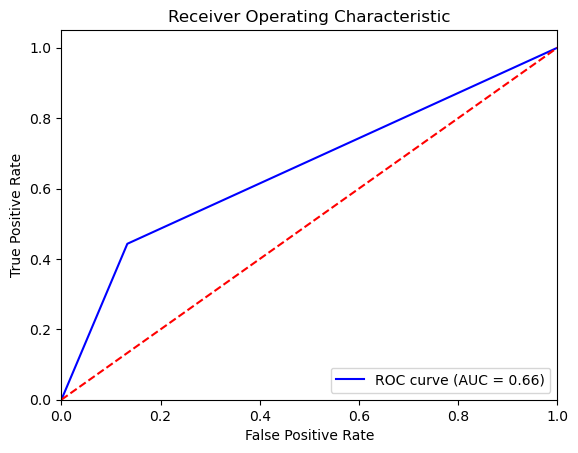

In [111]:
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important
variables and their thresholds. Use domain knowledge and common sense to explain the patterns and
trends.

In [112]:
from sklearn import tree

[Text(0.5, 0.9, 'x[1] <= 117.5\ngini = 0.454\nsamples = 468\nvalue = [305, 163]'),
 Text(0.22916666666666666, 0.7, 'x[6] <= 0.639\ngini = 0.236\nsamples = 241\nvalue = [208, 33]'),
 Text(0.125, 0.5, 'x[5] <= 49.8\ngini = 0.167\nsamples = 196\nvalue = [178, 18]'),
 Text(0.08333333333333333, 0.3, 'x[7] <= 30.5\ngini = 0.159\nsamples = 195\nvalue = [178, 17]'),
 Text(0.041666666666666664, 0.1, 'gini = 0.086\nsamples = 133\nvalue = [127, 6]'),
 Text(0.125, 0.1, 'gini = 0.292\nsamples = 62\nvalue = [51, 11]'),
 Text(0.16666666666666666, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3333333333333333, 0.5, 'x[0] <= 6.5\ngini = 0.444\nsamples = 45\nvalue = [30, 15]'),
 Text(0.25, 0.3, 'x[6] <= 0.762\ngini = 0.353\nsamples = 35\nvalue = [27, 8]'),
 Text(0.20833333333333334, 0.1, 'gini = 0.498\nsamples = 15\nvalue = [8, 7]'),
 Text(0.2916666666666667, 0.1, 'gini = 0.095\nsamples = 20\nvalue = [19, 1]'),
 Text(0.4166666666666667, 0.3, 'x[1] <= 87.5\ngini = 0.42\nsamples = 10\nvalue = [

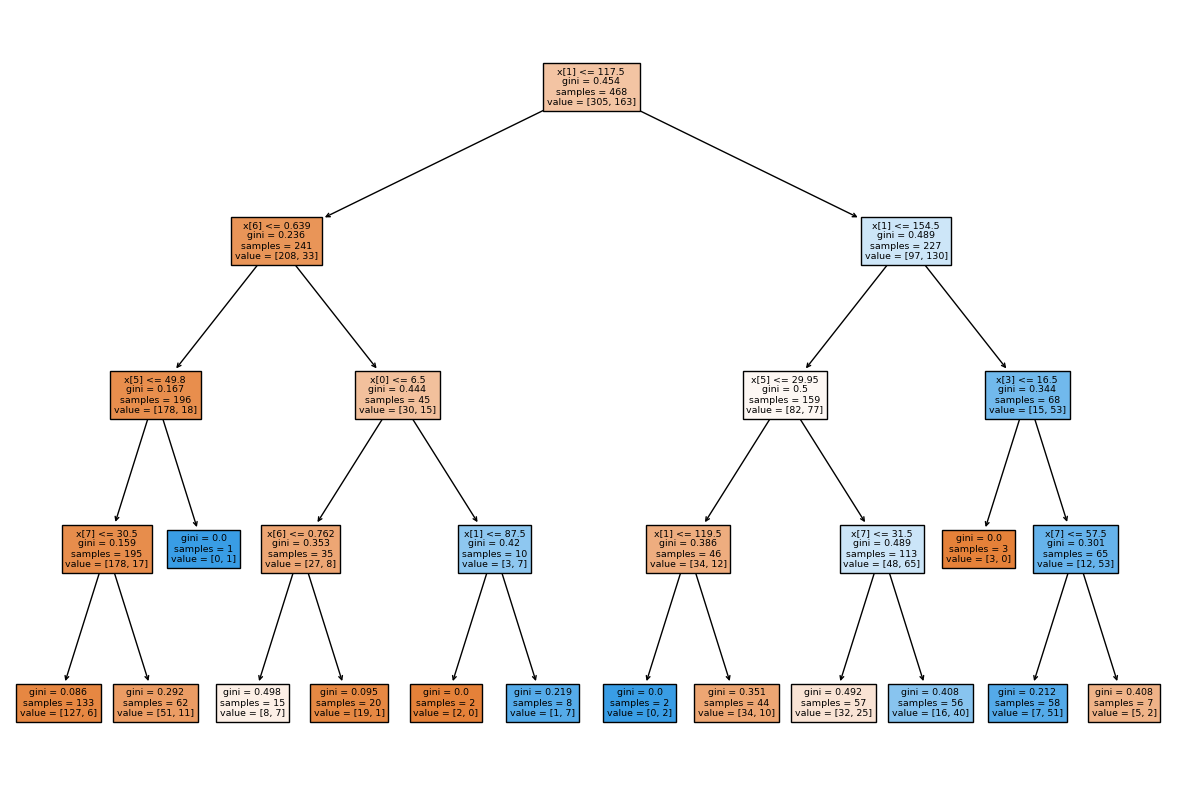

In [113]:
plt.figure(figsize=(15,10))
tree.plot_tree(tree_classifier,filled= True)